<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

Airbnb es una empresa que ofrece una plataforma de software dedicada a la oferta de alojamientos particulares y turísticos mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios. Muchos nuevos anfitriones no cuentan con información global de tendencias del mercado por lo que sus precios no son óptimos. Airbnb gana una comisión por cada arrendamiento, por lo tanto, está interesado en que sus anfitriones cobren una tarifa óptima de acuerdo a las características del hospedaje. Si los anfitriones ganan más… Airbnb también.

Problema de Negocio: La empresa Airbnb lo ha contratado para desarrollar un análisis descriptivo y exploratorio que permita responder la siguiente pregunta: ¿Cuál es la variable o característica más relevante para determinar el precio de un hospedaje en Airbnb?

Sistema de información: El conjunto de datos objetivo posee información acerca de 30.000 hospedajes de la plataforma Airbnb en la ciudad de Nueva York. Los datos a usar son datos públicos creados por Inside Airbnb.



## **1. Instalar e importar pandas y otras librerías útiles**

In [ ]:
!pip install -U pandas

In [ ]:
# pd y np son los alias más empleados para estas 2 librerías

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)

Python 3.10.12
NumPy 1.26.4
Pandas 2.2.3
Matplotlib 3.7.1


In [ ]:
## Cargar el dataset de trabajo
pd.options.display.max_columns = 100 # Permite visualizar todas las columnas del dataframe

airbnb = pd.read_csv('https://github.com/HarryVargas96/UdeCataluna/blob/main/data/airbnb.csv?raw=true', delimiter=',')

airbnb.head(3)

,id,name,transit,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Very close to F and G trains and Express bus i...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1


**2. Diccionario de Datos**

Aqui se puede visualizar el diccionario de datos

[Diccionario](https://1drv.ms/b/s!AlfdOuvLQe7MiIQTooKiQledNcCYjw?e=aClqN3)

## **3. Conocemos los datos**

# Dimensiones del dataframe
Se utiliza airbnb.shape para determinar las dimensiones del dataframe.

In [ ]:
airbnb.shape

(30179, 76)

### Resumen

El dataset housing está conformado por 76 variables y 30179 observaciones. En este dataset se resumen algunas características. Esto se puede observar con el airbnb.info


In [ ]:
# Resumen de las variables del dataframe
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   transit                                       18190 non-null  object 
 3   host_id                                       30179 non-null  int64  
 4   host_since                                    30170 non-null  float64
 5   host_response_time                            17082 non-null  object 
 6   host_response_rate                            17082 non-null  float64
 7   host_is_superhost                             30170 non-null  float64
 8   host_listings_count                           30170 non-null  float64
 9   host_identity_verified                        30170 non-null 

## **6. Descripción general**

Podemos observar los nombres de las 76 variables que componen el dataset. De las cuales 49 son tipo entero y 11 son tipo object y 16 decimales. También podemos observar que no hay valores nulos dentro del dataset.

La variable objetivo será el **precio** **"price"** y se intentará buscar las varibles que inciden en la determminación de la variable objetivo

## **7. Estadística descriptiva y limpieza de datos**

El método `DataFrame.describe()` es quizá una de las mejores maneras de conocer rápidamente los datos ya que presenta un resumen estadístico completo de cada variable. Para datos numéricos el resumen incluye:
* conteo
* promedio
* desviación estándar
* valor mínimo y máximo (rango)
* cuartiles - percentiles 25, 50 o (mediana)y 75

In [ ]:
airbnb.describe()

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
count,3.017900e+04,3.017900e+04,30170.000000,17082.000000,30170.000000,30170.000000,30170.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.0,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,21094.000000,21068.000000,21078.000000,21050.000000,21069.000000,21047.000000,21049.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,21919.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.00000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000
mean,2.088031e+07,7.238659e+07,42160.939211,0.913360,0.083560,16.073285,0.487305,40.728593,-73.952292,2.723781,1.151595,1.265516,1.527287,132.949965,1.427416,12.620365,6.283740,1.0,6.199742,14.895325,24.232446,94.362040,4.459889,2.456145,93.643975,9.567543,9.192049,9.694252,9.713275,9.553476,9.369851,0.358461,7.956128,6.117897,1.703801,0.134431,0.797324,-0.857782,0.652540,-0.984956,-0.936777,-0.898075,-0.984294,-0.550615,-0.836376,0.331654,-0.635574,-0.577918,-0.070082,-0.414626,-0.792770,-0.524570,-0.394877,-0.914046,-0.714040,-0.902316,0.951887,-0.693893,-0.64134,-0.681898,-0.850028,-0.648696,-0.889460,-0.876470,-0.937838
std,1.090207e+07,8.296663e+07,841.819786,0.190183,0.276731,91.709777,0.499847,0.054541,0.044117,1.700634,0.422225,0.614659,0.997217,93.151824,1.029999,23.073653,8.849725,0.0,9.980716,20.874474,32.340404,129.373759,5.265633,4.133615,10.155133,0.970806,1.248211,0.834611,0.838397,0.854678,1.040004,0.479556,35.468893,34.475557,6.823070,1.096594,1.205727,0.514022,0.757767,0.172806,0.349932,0.439850,0.176542,0.834773,0.548165,0.943417,0.772052,0.816108,0.997558,0.910007,0.609531,0.851381,0.918749,0.405617,0.700117,0.431082,0.306454,0.720090,0.76727,0.731459,0.526746,0.761060,0.457021,0.481464,0.347080
min,2.539000e+03,2.787000e+03,39698.000000,0.000000,0.000000,0.000000,0.000000,40.499790,-74.244420,1.000000,0.500000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.127817e+07,9.165996e+06,41552.000000,0.910000,0.000000,1.000000,0.000000,40.690720,-73.982085,2.000000,1.000000,1.000000,1.000000,65.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,9.000000,9

Ahora hacemos un análisis descriptivo de la variable objetivo "price"

In [ ]:
airbnb['price'].describe()


,price
count,30179.000000
mean,132.949965
std,93.151824
min,0.000000
25%,65.000000
50%,100.000000
75%,175.000000
max,500.000000


El método `DataFrame.describe()` también permite hacer un resumen para variables categóricas. El resumen incluye:
* conteo
* cantidad de valores únicos
* etiqueta con mayor frecuencia - moda
* frecuencia de la moda

Veamos ahora como podemos calcular algunos descriptores únicamente para la variable precio que es la variable predictora. Podemos filtrar una variable de un dataset usando esta estructura `df['Nombre de la variable']` más adelante vamos a desarrollar funciones avanzadas empleando esta misma estructura.



In [ ]:
#Elegir una sola columna o serie
airbnb['price']

,price
0,149
1,150
2,190
3,60
4,80
...,...
30174,65
30175,70
30176,40
30177,55


In [ ]:
type(airbnb['price'])

pandas.core.series.Series

In [ ]:
# Retorna el conteo de todos los valores no nulos

print('Conteo :', airbnb['price'].count())

print('Conteo de precios cero:', (airbnb['price'] == 0).sum())
print('Conteo precios menor de 20:', (airbnb['price'] < 20).sum())



# Retorna la suma de la serie
print('El precio de todas las casas suma: ', airbnb['price'].sum())

# Retorna el mínimo de la serie

print('El valor mínimo es : ', airbnb['price'].min() )

# Retorna el máximo de la serie

print('El valor máximo es : ', airbnb['price'].max() )

# Retorna la media de una serie

print('La media del precio es: ',airbnb['price'].mean())

# Retorna la mediana de una serie

print('La mediana del precio es: ',airbnb['price'].median())

# Retorna los cuantiles listados de la serie o dataframe

print('Percentil 50 y 99 del precio\n',airbnb['price'].quantile([0.5, 0.99]))

# Retorna la varianza de una serie

print('La desviación estándar del precio: ',airbnb['price'].std())


Conteo : 30179
Conteo de precios cero: 0
Conteo precios menor de 20: 0
El precio de todas las casas suma:  3617350.181560811
El valor mínimo es :  20.0
El valor máximo es :  330.0
La media del precio es:  119.86315588855864
La mediana del precio es:  100.0
Percentil 50 y 99 del precio
 0.50    100.0
0.99    300.0
Name: price, dtype: float64
La desviación estándar del precio:  68.81609916983119


*Limpiar Datos*
Para el mejor funcionamiento del modelo se van a reemplazar del precio los valores **menores a 20 y mayores a 330** por la media de **132.94**

In [ ]:
mean_price = int(airbnb['price'].mean())
mean_price = airbnb['price'].mean()
airbnb.loc[airbnb['price'] < 20, 'price'] = mean_price
airbnb.loc[airbnb['price'] > 330, 'price'] = mean_price

In [ ]:
# Cuáles columnas NO son un objeto (texto)
# != -> no es igual a
#airbnb.dtypes
#print(airbnb.dtypes)
airbnb.dtypes != 'object'

,0
id,True
name,False
transit,False
host_id,True
host_since,True
...,...
secure,True
self_check_in,True
smoking_allowed,True
accessible,True


In [ ]:
airbnb.dtypes[airbnb.dtypes!='object'].index

Index(['id', 'host_id', 'host_since', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq',
       'balcony', 'nature

In [ ]:
cols = airbnb.dtypes[airbnb.dtypes!='object'].index
print(cols)

airbnb[cols].median()

Index(['id', 'host_id', 'host_since', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq',
       'balcony', 'nature

,0
id,21750219.0
host_id,33149697.0
host_since,42141.5
host_response_rate,1.0
host_is_superhost,0.0
...,...
secure,-1.0
self_check_in,-1.0
smoking_allowed,-1.0
accessible,-1.0


In [ ]:
airbnb_numeros = airbnb[cols]
airbnb_numeros.head(2)

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,2787,39698.0,1.0,0.0,6.0,1.0,40.64749,-73.97237,2,1.0,1,1,149.0,1,35,1,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,4632,39777.0,1.0,0.0,1.0,1.0,40.80902,-73.94190,2,1.0,1,1,150.0,2,20,3,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


Cuando se trata de variables categóricas (o numéricas discretas) deseamos saber los posibles valores de esa variable y también el conteo de valores por cada categoria.

In [ ]:
# Veamos ahora cuales son esos posibles valores
airbnb['price'].unique()

array([149.        , 150.        , 190.        ,  60.        ,
        80.        , 120.        , 115.        , 200.        ,
       110.        , 225.        , 130.        ,  50.        ,
        98.        ,  89.        , 125.        , 140.        ,
       133.08344706, 170.        ,  75.        ,  90.        ,
        77.        , 250.        , 199.        , 160.        ,
       100.        , 195.        , 105.        , 239.        ,
       175.        ,  70.        , 129.        ,  49.        ,
        55.        , 135.        , 249.        , 179.        ,
        79.        , 165.        ,  87.        ,  85.        ,
       141.        , 145.        ,  95.        , 205.        ,
       219.        , 106.        , 300.        , 255.        ,
       265.        , 185.        ,  40.        , 172.        ,
       270.        , 241.        , 280.        , 246.        ,
        69.        , 299.        , 155.        ,  99.        ,
       310.        , 167.        , 147.        , 220.  

In [ ]:
print('Precios únicos ordenados:', sorted(airbnb['price'].unique()))


Precios únicos ordenados: [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 132.9499652075947, 133.0, 133.08344706093146, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0,

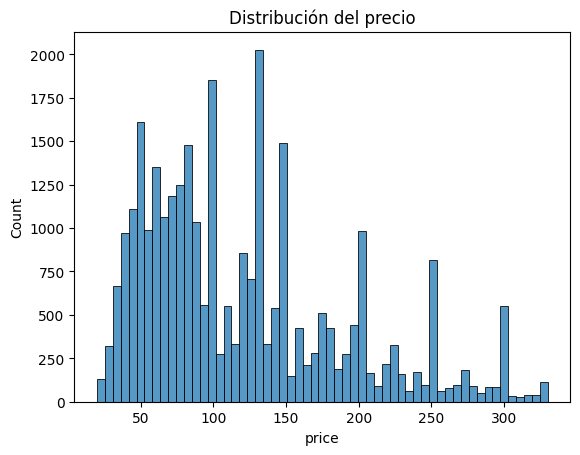

In [ ]:
sns.histplot(data= airbnb, x='price')
plt.title ('Distribución del precio')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


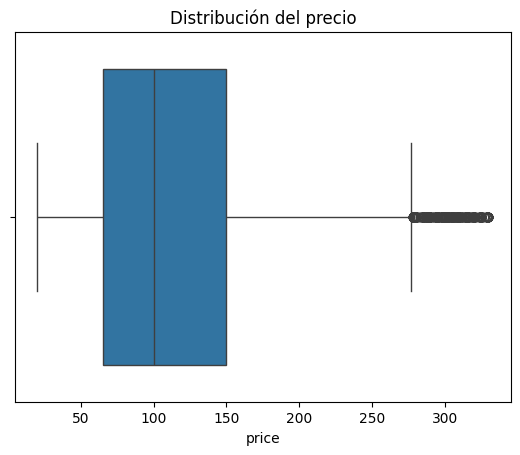

In [ ]:
sns.boxplot(data= airbnb, x='price')
plt.title ('Distribución del precio')
plt.show()

In [ ]:
airbnb['price'].value_counts()


,count
price,
133.083447,1460
100.000000,1339
150.000000,1292
50.000000,1122
60.000000,999
...,...
292.000000,1
266.000000,1
318.000000,1


In [ ]:
airbnb['price'].value_counts(normalize=True)*100

,proportion
price,
100,4.436860
150,4.281123
50,3.717817
60,3.310249
200,3.194274
...,...
423,0.003314
362,0.003314
373,0.003314


## **8. Análisis de correlación**

In [ ]:
(airbnb[cols].corrwith(airbnb['price'], method='pearson')
.reset_index()
.rename(columns={'index':'variable' , 0: 'coeficiente'})
.sort_values(by='coeficiente', ascending=False)
)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,variable,coeficiente
13,price,1.000000
9,accommodates,0.485562
11,bedrooms,0.339032
12,beds,0.326770
45,tv,0.275108
...,...,...
62,smoking_allowed,-0.070563
35,calculated_host_listings_count_shared_rooms,-0.115965
34,calculated_host_listings_count_private_rooms,-0.148783
8,longitude,-0.299118


**Dataframe nuevo**: Se realiza una copia con del dataframe con valores absolutos

In [ ]:
coeficiente_minimo = 0.20
coeficiente_maximo = 0.95

In [ ]:
df_coeficientes = (airbnb[cols]
                   .drop(['latitude','longitude', 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_entire_homes'], axis=1)
                   .corrwith(airbnb['price'], method='spearman')
                   .reset_index()
                   .rename(columns={'index':'variable' , 0: 'coeficiente'})
                   .sort_values(by=['coeficiente'])
                  )
df_coeficientes['coeficiente_absoluto'] = np.abs (df_coeficientes['coeficiente'])
df_coeficientes = df_coeficientes[(df_coeficientes['coeficiente_absoluto'] >= coeficiente_minimo) & (df_coeficientes['coeficiente_absoluto'] <= coeficiente_maximo)]
df_coeficientes

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


,variable,coeficiente,coeficiente_absoluto
34,air_conditioning,0.222662,0.222662
45,elevator,0.224471,0.224471
47,child_friendly,0.240388,0.240388
12,guests_included,0.288179,0.288179
41,tv,0.293018,0.293018
9,bedrooms,0.386929,0.386929
10,beds,0.404848,0.404848
7,accommodates,0.577331,0.577331


Se hace una lista de variables que el grado de correlación están entre 0.20 y 0.95

**Se hace un listado de variables object**

In [ ]:
airbnb.select_dtypes(include='object').columns

Index(['name', 'transit', 'host_response_time', 'street', 'neighbourhood',
       'property_type', 'room_type', 'bed_type', 'amenities',
       'calendar_updated', 'cancellation_policy'],
      dtype='object')

In [ ]:
airbnb.select_dtypes('object')[['neighbourhood','property_type','room_type','bed_type','amenities']].head(2)

,neighbourhood,property_type,room_type,bed_type,amenities
0,Brooklyn,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces..."
1,Harlem,Apartment,Private room,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K..."


In [ ]:
lista_columnas_coeficientes = df_coeficientes['variable'].tolist()
print (f'Se listan {len(lista_columnas_coeficientes)} variables predictor por analizar')
lista_columnas_coeficientes

Se listan 8 variables predictor por analizar


['air_conditioning',
 'elevator',
 'child_friendly',
 'guests_included',
 'tv',
 'bedrooms',
 'beds',
 'accommodates']

Ahora con esta lista hacemos un dataframe más reducido denominado: **airbnb_simplificado** y se adicionan dos variables tipo objeto

In [ ]:
airbnb.price
print('Precios únicos ordenados:', sorted(airbnb['price'].unique()))

Precios únicos ordenados: [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 132.9499652075947, 133.0, 133.08344706093146, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0,

In [ ]:
lista_total_columnas = ['price'] +lista_columnas_coeficientes+ ['room_type','bed_type','bedrooms','beds']
airbnb_simplificado = airbnb[lista_total_columnas]
airbnb_simplificado.head()

,price,air_conditioning,elevator,child_friendly,guests_included,tv,bedrooms,beds,accommodates,room_type,bed_type,bedrooms,beds
0,149.0,-1,1,-1,1,1,1,1,2,Private room,Real Bed,1,1
1,150.0,1,-1,-1,2,1,1,1,2,Private room,Pull-out Sofa,1,1
2,190.0,1,1,-1,1,1,2,2,4,Entire home/apt,Real Bed,2,2
3,60.0,1,-1,-1,1,-1,1,1,2,Private room,Real Bed,1,1
4,80.0,-1,1,1,1,-1,1,1,2,Private room,Real Bed,1,1


In [ ]:
airbnb_simplificado.price
print('Precios únicos ordenados:', sorted(airbnb_simplificado['price'].unique()))

Precios únicos ordenados: [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 132.9499652075947, 133.0, 133.08344706093146, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0,

**Se realizan gráficos con algunas de las variables seleccionadas**

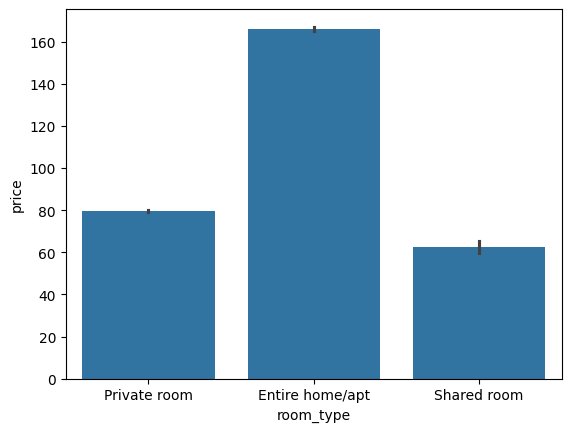

In [ ]:
sns.barplot(data=airbnb_simplificado,
            x='room_type',
            y='price')
plt.show()


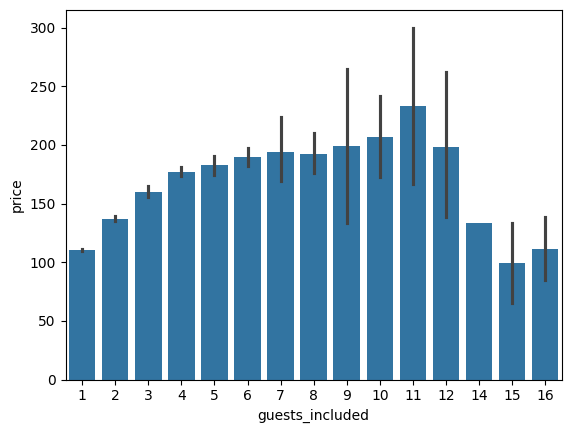

In [ ]:
sns.barplot(data=airbnb_simplificado,
            x='guests_included',
            y='price')
plt.show()


## **9. Transformación de datos**

In [ ]:
airbnb_simplificado['price'].mean

<bound method Series.mean of 0        149.0
1        150.0
2        190.0
3         60.0
4         80.0
         ...  
30174     65.0
30175     70.0
30176     40.0
30177     55.0
30178     90.0
Name: price, Length: 30179, dtype: float64>

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
var_numericas = airbnb_simplificado.select_dtypes(include='number').drop(['price'], axis=1)
var_string = airbnb_simplificado.select_dtypes('object')

In [ ]:
var_numericas.head(2)

,air_conditioning,elevator,child_friendly,guests_included,tv,bedrooms,beds,accommodates,bedrooms,beds
0,-1,1,-1,1,1,1,1,2,1,1
1,1,-1,-1,2,1,1,1,2,1,1


In [ ]:
var_string

,room_type,bed_type
0,Private room,Real Bed
1,Private room,Pull-out Sofa
2,Entire home/apt,Real Bed
3,Private room,Real Bed
4,Private room,Real Bed
...,...,...
30174,Private room,Real Bed
30175,Private room,Real Bed
30176,Private room,Real Bed
30177,Shared room,Real Bed


In [ ]:
scaler = StandardScaler()
scaler.fit(var_numericas)
var_numericas_transformadas = scaler.transform(var_numericas)
df_var_numericas = pd.DataFrame(var_numericas_transformadas, columns=var_numericas.columns.tolist())
df_var_numericas.head(2)

,air_conditioning,elevator,child_friendly,guests_included,tv,bedrooms,beds,accommodates,bedrooms,beds
0,-2.180838,1.554548,-0.558431,-0.414975,0.708443,-0.43198,-0.528767,-0.425602,-0.43198,-0.528767
1,0.458539,-0.643274,-0.558431,0.555916,0.708443,-0.43198,-0.528767,-0.425602,-0.43198,-0.528767


In [ ]:
df_var_string_dummies = pd.get_dummies(var_string).fillna(False)
df_var_string_dummies.head(2)

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,False,True,False,False,False,False,False,True
1,False,True,False,False,False,False,True,False


In [ ]:
df_var_total = (df_var_numericas
                .merge(df_var_string_dummies,
                  how='left',
                   left_index=True,
                   right_index=True
                  )
                )

df_var_total.head(2)

,air_conditioning,elevator,child_friendly,guests_included,tv,bedrooms,beds,accommodates,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,-2.180838,1.554548,-0.558431,-0.414975,0.708443,-0.43198,-0.528767,-0.425602,-0.43198,-0.528767,False,True,False,False,False,False,False,True
1,0.458539,-0.643274,-0.558431,0.555916,0.708443,-0.43198,-0.528767,-0.425602,-0.43198,-0.528767,False,True,False,False,False,False,True,False


## **10. Construir el modelo**

**Se hace partición de la data, vamos a emplear 30% para entrenamiento y 70% para testeo**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

In [ ]:
x= df_var_total
y= airbnb_simplificado['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=13)

In [ ]:
x_train.shape

(19616, 18)

In [ ]:
x_test.shape

(10563, 18)

In [ ]:
reg = RandomForestRegressor(max_depth=100,
                             n_estimators=1000,
                             random_state=13)
reg.fit(x_train, y_train)
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

mae_train = mae(y_train, y_train_pred)
mae_test = mae(y_test, y_test_pred)

print(f'MAE en entrenamiento: {mae_train}')
print(f'MAE en testeo: {mae_test}')
print(f'R2 en entrenamiento: {r2(y_train, y_train_pred)}')
print(f'R2 en testeo: {r2(y_test, y_test_pred)}')

MAE en entrenamiento: 33.704902326665554
MAE en testeo: 37.33305665382964
R2 en entrenamiento: 0.5661741069618249
R2 en testeo: 0.4587893262257918


In [ ]:
reg.predict(x_train)

array([ 64.56381918, 162.02280123, 134.4484405 , ..., 150.47088264,
       203.15620116, 156.13184073])

## **Recursos adicionales**

## **Créditos**
---

**Profesores:** Harry Vargas Rodríguez, Julian Rojas y Harold Uribe

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*